# Case study on Applications of supervised learning

In [1016]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [1017]:
Data=pd.read_csv('mobile_price.csv')

In [1018]:
Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2. Feature Description

In [1019]:
Data.shape

(2000, 21)

In [1020]:
Data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [1021]:
Data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [1022]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [1023]:
Data.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

## 3.Verifying missing values

In [1024]:
Data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 4.Preprocessing

In [1025]:
d=Data.loc[Data['px_height']==0]

In [1026]:
Data.loc[Data['sc_w']==0]                                             

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [1027]:
Data=Data.loc[Data['sc_w']>0]  

In [1028]:
Data.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [1029]:
Data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,...,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,...,646.731319,1252.686264,2133.372527,12.485714,6.337363,11.007143,0.760989,0.507692,0.513187,1.509341
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,...,444.877537,432.342583,1087.197536,4.166849,4.152062,5.455951,0.426597,0.500078,0.499963,1.119285
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.750000,877.000000,1203.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,...,561.500000,1250.000000,2174.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,...,952.000000,1633.000000,3072.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Text(0.5, 1.0, 'Boxplot of fc')

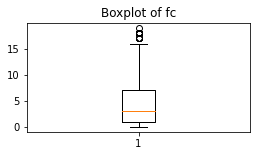

In [1030]:
plt.figure(figsize=(4,2))
plt.boxplot(Data['fc'])
plt.title('Boxplot of fc')



In [1031]:
Data.loc[(Data['fc']>16)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [1032]:
Q1=np.percentile(Data['fc'],25, interpolation='midpoint')
Q2=np.percentile(Data['fc'],50, interpolation='midpoint')
Q3=np.percentile(Data['fc'],75, interpolation='midpoint')

IQR=Q3-Q1

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in Data['fc']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

outlier

[18, 17, 18, 17, 17, 18, 17, 17, 18, 18, 18, 17, 18, 18, 19, 18, 18, 18]

In [1033]:

Data.drop(Data.loc[Data['fc']>up_lim].index)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Text(0.5, 1.0, 'Correlation ')

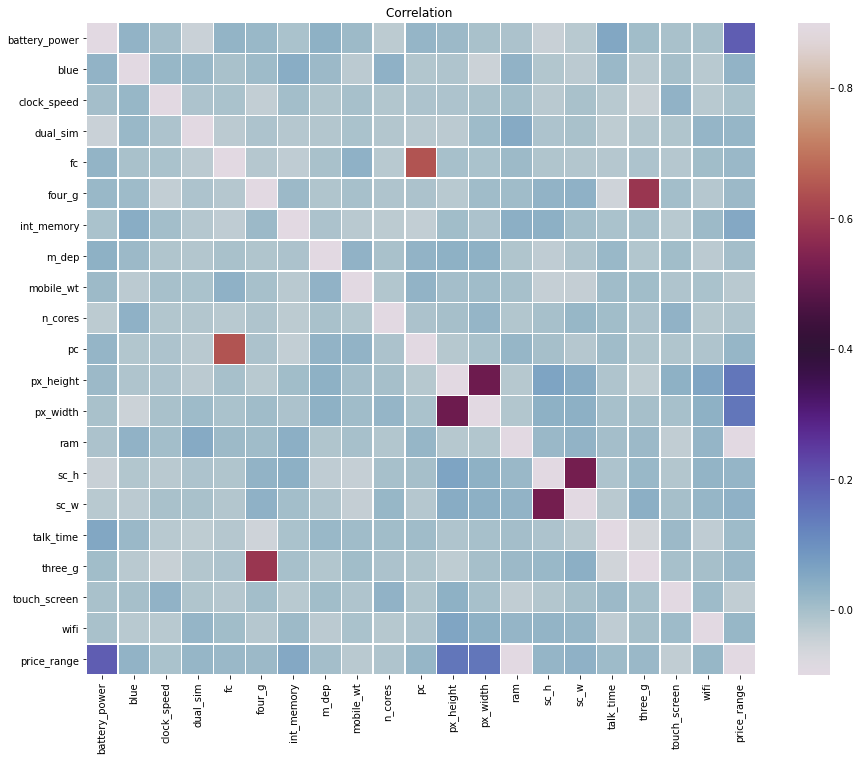

In [1034]:
corr=Data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='twilight',vmin=-0.1,vmax=0.9,linewidth=0.3)
r.set_title("Correlation ")

## 5.Feature Engineering

In [1035]:
y= Data['price_range']
X=Data.drop(['price_range'],axis=1)

In [1036]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [1037]:
X['total_px']=X['px_width']*X['px_height']


In [1038]:
X=X.drop(['px_height','px_width'],axis=1)

In [1039]:
X['sc_area']=X['sc_h']*X['sc_w']
X=X.drop(['sc_h','sc_w'],axis=1)

In [1040]:
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,total_px,sc_area
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1.820000e+03,1820.000000
mean,1237.843956,0.503846,1.519670,0.504396,4.319231,0.524725,32.139560,0.499890,140.585714,4.532967,9.882418,2133.372527,11.007143,0.760989,0.507692,0.513187,9.090283e+05,88.194505
std,439.940961,0.500123,0.813829,0.500118,4.354894,0.499526,18.114542,0.288805,35.428886,2.289520,6.007821,1087.197536,5.455951,0.426597,0.500078,0.499963,8.322466e+05,76.062816
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000
25%,845.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,1203.750000,6.000000,1.000000,0.000000,0.000000,2.642470e+05,28.000000
50%,1230.500000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.500000,5.000000,10.000000,2174.000000,11.000000,1.000000,1.000000,1.000000,5.979640e+05,65.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,15.000000,3072.250000,16.000000,1.000000,1.000000,1.000000,1.370468e+06,130.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,3.886306e+06,342.000000


### Spliting of dataset

In [1041]:
from sklearn.model_selection import train_test_split

In [1042]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.2)

In [1043]:
X_train.shape

(1456, 18)

In [1044]:
y_train.shape

(1456,)

In [1045]:
X_test.shape

(364, 18)

In [1046]:
y_test.shape

(364,)

In [1047]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'total_px', 'sc_area'],
      dtype='object')

In [1048]:
y_test.value_counts()

2    99
3    94
0    91
1    80
Name: price_range, dtype: int64

## 6. Building the models

In [1049]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [1050]:
from sklearn.metrics import mean_squared_error


In [1051]:
from sklearn import preprocessing

In [1052]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [1053]:
sd=preprocessing.StandardScaler()
X=sd.fit_transform(X)

X_train=sd.fit_transform(X_train)
X_test=sd.fit_transform(X_test)

### 1. Logistic Regression

In [1054]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_lg = logit_model.predict(X_test)

In [1055]:
print('accuracy  :', accuracy_score(y_pred_lg,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_lg ,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_lg ,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_lg ,average='macro')))

accuracy  : 0.9093406593406593
F1 score  :0.91
precision :0.91
recall is :0.91


In [1056]:
confusion_matrix(y_pred_lg,y_test)

array([[89,  7,  0,  0],
       [ 2, 73,  5,  0],
       [ 0,  0, 86, 11],
       [ 0,  0,  8, 83]], dtype=int64)

### 2. KNN

In [1057]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred_kn= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kn)
    acc_value.append(acc)

In [1058]:
acc_value

[0.46703296703296704,
 0.489010989010989,
 0.5,
 0.5,
 0.5082417582417582,
 0.5274725274725275,
 0.5521978021978022,
 0.532967032967033,
 0.5384615384615384,
 0.5467032967032966,
 0.5439560439560439,
 0.5357142857142857]

Text(0, 0.5, 'accuracy')

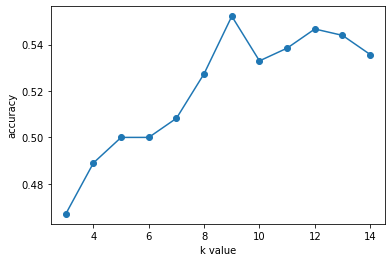

In [1059]:

plt.plot(neighbors,acc_value ,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [1060]:
classifier=KNeighborsClassifier(n_neighbors=9, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred_kn= classifier.predict(X_test)

In [1061]:
print('accuracy  :', accuracy_score(y_pred_kn,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_kn ,average='weighted')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_kn ,average='weighted')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_kn ,average='weighted')))

accuracy  : 0.5521978021978022
F1 score  :0.55
precision :0.57
recall is :0.55


In [1062]:
confusion_matrix(y_pred_kn,y_test)

array([[72, 30, 11,  2],
       [17, 36, 27, 11],
       [ 2, 12, 46, 34],
       [ 0,  2, 15, 47]], dtype=int64)

### 3. Decision Tree

In [1063]:
from sklearn.tree import DecisionTreeClassifier

In [1064]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [1065]:
print('accuracy  :', accuracy_score(y_pred_dt,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_dt,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_dt ,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_dt ,average='macro')))

accuracy  : 0.8269230769230769
F1 score  :0.83
precision :0.83
recall is :0.83


In [1066]:
confusion_matrix(y_pred_dt,y_test)

array([[83,  8,  0,  0],
       [ 8, 64, 14,  0],
       [ 0,  8, 73, 13],
       [ 0,  0, 12, 81]], dtype=int64)

In [1067]:
y_test.value_counts()

2    99
3    94
0    91
1    80
Name: price_range, dtype: int64

### 3. Support Vector Machine (SVM)

##### SVM (linear)

In [1081]:
from sklearn.svm import SVC
sv= SVC(kernel='linear') 
sv.fit(X_train,y_train) 
y_pred_sv = sv.predict(X_test) 
acc_svm = metrics.accuracy_score(y_test,y_pred_sv)


In [1082]:
print('accuracy  :', accuracy_score(y_pred_sv,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_sv ,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_sv ,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_sv ,average='macro')))

accuracy  : 0.9093406593406593
F1 score  :0.91
precision :0.91
recall is :0.91


In [1083]:
confusion_matrix(y_pred_sv,y_test)

array([[89,  6,  0,  0],
       [ 2, 72,  5,  0],
       [ 0,  2, 86, 10],
       [ 0,  0,  8, 84]], dtype=int64)

##### SVM (poly)

In [1071]:
from sklearn.svm import SVC
sv= SVC(kernel='poly',degree=3) 
sv.fit(X_train,y_train) 
y_pred_sv = sv.predict(X_test) 
acc_svm = metrics.accuracy_score(y_test,y_pred_sv)

In [1072]:
print('accuracy  :', accuracy_score(y_pred_sv,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_sv ,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_sv ,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_sv ,average='macro')))

accuracy  : 0.7774725274725275
F1 score  :0.78
precision :0.79
recall is :0.78


In [1073]:
confusion_matrix(y_pred_sv,y_test)

array([[83,  9,  0,  0],
       [ 8, 57, 14,  1],
       [ 0, 14, 79, 29],
       [ 0,  0,  6, 64]], dtype=int64)

##### SVM (poly)

In [1074]:
from sklearn.svm import SVC
sv= SVC(kernel='rbf') 
sv.fit(X_train,y_train) 
y_pred_sv = sv.predict(X_test) 
acc_svm = metrics.accuracy_score(y_test,y_pred_sv)

In [1075]:
print('accuracy  :', accuracy_score(y_pred_sv,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_sv ,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_sv ,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_sv ,average='macro')))

accuracy  : 0.8461538461538461
F1 score  :0.85
precision :0.85
recall is :0.85


In [1076]:
confusion_matrix(y_pred_sv,y_test)

array([[83,  9,  0,  0],
       [ 8, 66, 12,  0],
       [ 0,  5, 82, 17],
       [ 0,  0,  5, 77]], dtype=int64)

### 4. Random Forest Classifier

In [1077]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=20)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [1078]:
mean_squared_error(y_test,y_pred_rf)

0.18681318681318682

In [1079]:
print('accuracy  :', accuracy_score(y_pred_rf,y_test))
print( 'F1 score  :{:.2f}'.format(f1_score(y_test,y_pred_rf ,average='macro')))
print( 'precision :{:.2f}'.format(precision_score(y_test,y_pred_rf,average='macro')))
print( 'recall is :{:.2f}'.format(recall_score(y_test,y_pred_rf ,average='macro')))

accuracy  : 0.8131868131868132
F1 score  :0.81
precision :0.81
recall is :0.82


In [1080]:
confusion_matrix(y_pred_rf,y_test)

array([[84,  9,  0,  0],
       [ 7, 65, 14,  0],
       [ 0,  6, 71, 18],
       [ 0,  0, 14, 76]], dtype=int64)

## 7.  Performance of the models

#### logistic Regression and SVM -linear gives best result for the Mobile price dataset with metric values as below:
